## Multi class logistic regression with categorical data

### About the dataset

**[Diamonds](https://www.kaggle.com/datasets/shivam2503/diamonds)**

Analyze diamonds by their cut, color, clarity, price, and other attributes

**Context**

This dataset contains the prices and other attributes of almost 54,000 diamonds. 

**Features**

- **price** price in US dollars (\$326--\$18,823)

- **carat** weight of the diamond (0.2--5.01)

- **cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

- **color** diamond colour, from J (worst) to D (best)

- **clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

- **x** length in mm (0--10.74)

- **y** width in mm (0--58.9)

- **z** depth in mm (0--31.8)

- **depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

- **table** width of top of diamond relative to widest point (43--95)

The target is 'cut', which has 5 classes: Ideal, Premium, Very Good, Good, and Fair (descending quality)

### Reading the dataset and basic EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
diamonds = pd.read_csv("./diamonds.csv").drop("Unnamed: 0", axis=1)  # dropping the first column which is unnamed
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [3]:
diamonds.shape

(53940, 10)

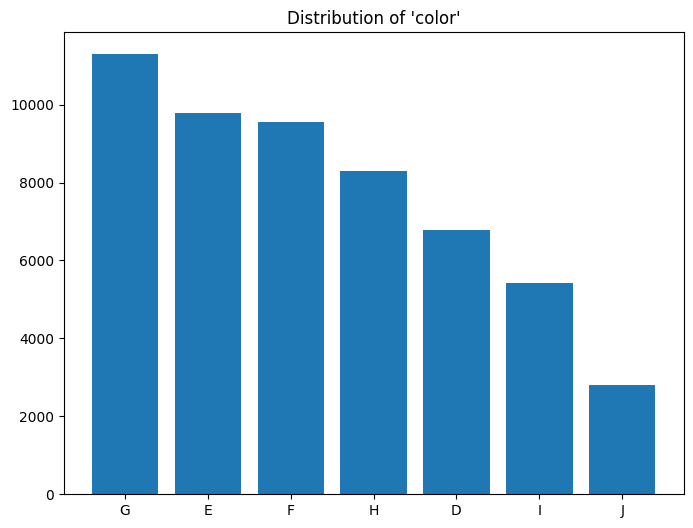

In [4]:
plt.figure(figsize=(8,6))
value_count = diamonds['color'].value_counts()
plt.bar(x = value_count.index, height=value_count.values.round(3))
plt.title("Distribution of 'color'")
plt.show()

In [5]:
value_count

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

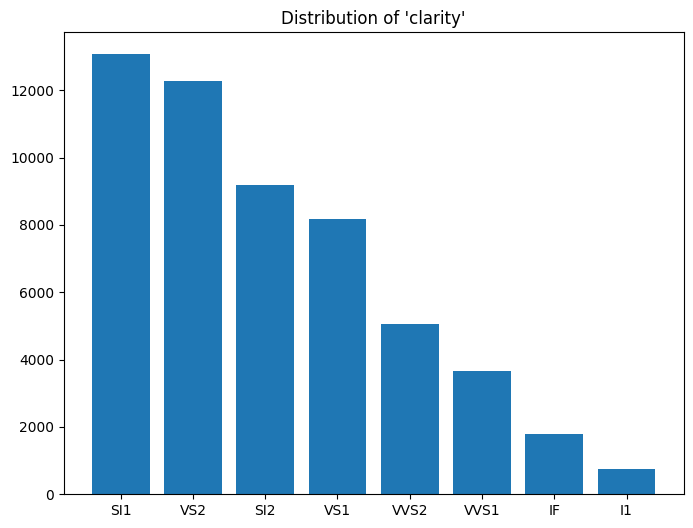

In [6]:
plt.figure(figsize=(8,6))
value_count = diamonds['clarity'].value_counts()
plt.bar(x = value_count.index, height=value_count.values.round(3))
plt.title("Distribution of 'clarity'")
plt.show()

In [7]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
diamonds.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.798,0.474,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749,1.433,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457,2.234,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.800,3989.440,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731,1.122,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.735,1.142,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.539,0.706,0.0,2.91,3.53,4.04,31.80


The above output shows the features are on different scales, suggesting we use some type of normalization. This step is essential for many linear models (like logistic regression) to perform well.

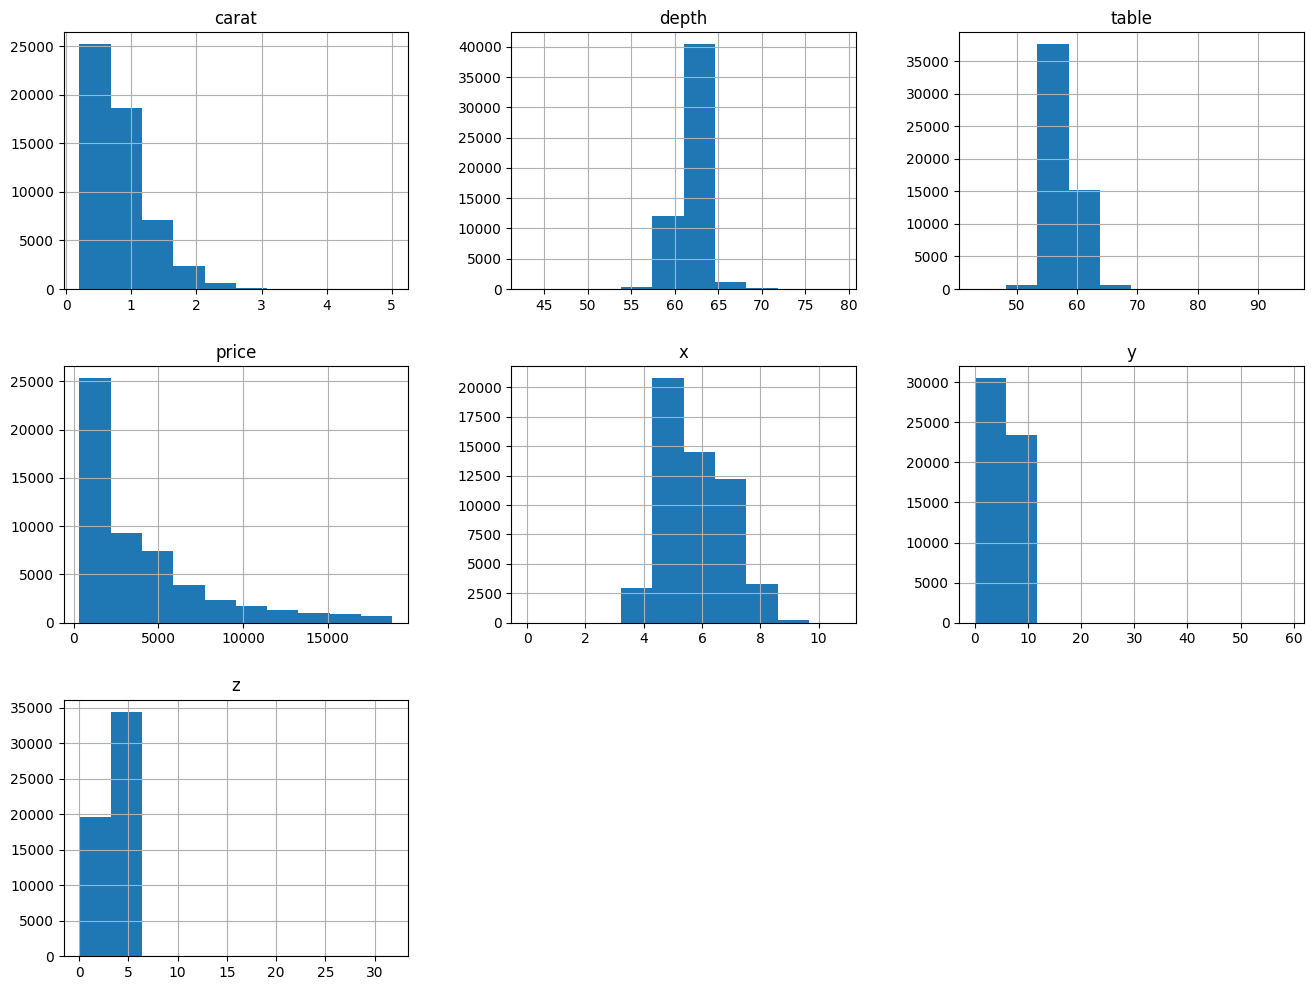

In [9]:
diamonds.hist(figsize=(16, 12));

In [10]:
# Distribution of target variable

diamonds['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

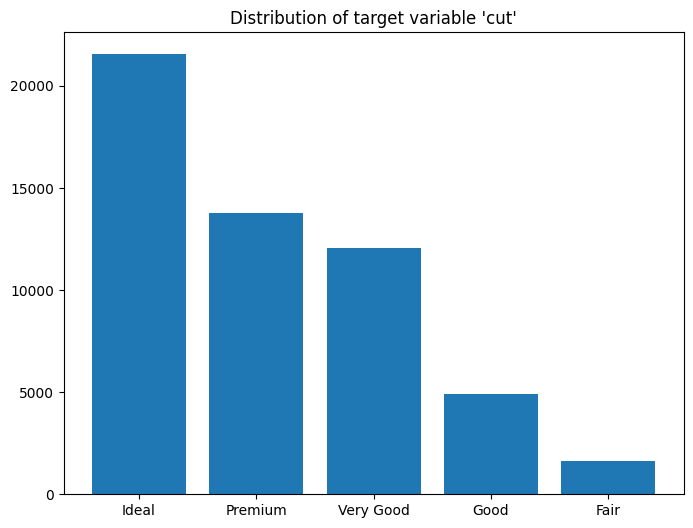

In [11]:
plt.figure(figsize=(8,6))
value_count = diamonds['cut'].value_counts()
plt.bar(x = value_count.index, height=value_count.values.round(3))
plt.title("Distribution of target variable 'cut'")
plt.show()

### Splitting the dataset into train and test and scaling / encoding features

In [12]:
from sklearn.model_selection import train_test_split

X = diamonds.drop('cut', axis=1)      # taking all the features except cut
y = diamonds['cut'].values.flatten() 

# Create train/test sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=123, test_size=0.3, stratify=y    # startified based on target variable, so that the distribution of the target variable is same in train and test dataset
)

In [13]:
X_train.shape, X_test.shape

((37758, 9), (16182, 9))

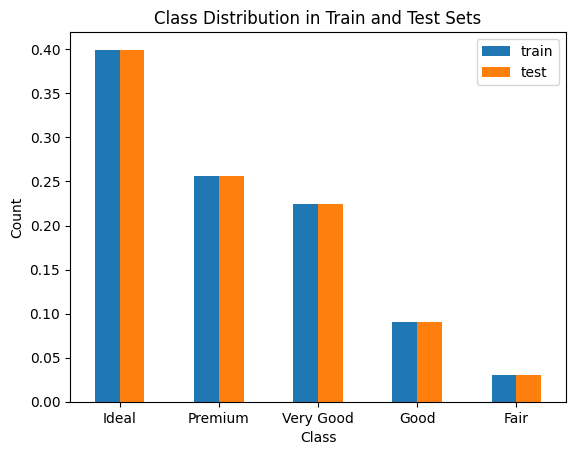

In [19]:
# Check the distribution of target variable in train and test dataset 
# This is to check the distribution of target variable is similar

df = pd.DataFrame({'train': pd.Series(y_train).value_counts(normalize=True),
                   'test': pd.Series(y_test).value_counts(normalize=True)})

df.plot(kind='bar')
plt.title('Class Distribution in Train and Test Sets')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Understanding Data Preprocessing in scikit-learn

When working with machine learning, it’s important to preprocess your data. scikit-learn provides powerful tools to make this process easy and organized. Here’s a quick guide to the main concepts:

---

#### 1. Pipeline

A **Pipeline** is a way to chain multiple data processing steps together, so you can treat them as a single object. This makes your code cleaner and helps avoid data leakage.

- **Why use it?**  
  Ensures that all preprocessing steps are applied in the correct order, both during training and testing.
- **Learn more:**  
  [scikit-learn Pipeline documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

---

#### 2. make_pipeline

**make_pipeline** is a helper function to quickly create a pipeline without naming each step.

- **Why use it?**  
  It’s faster and easier for simple pipelines.
- **Learn more:**  
  [scikit-learn make_pipeline documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

---

#### 3. Transformer

A **Transformer** is any object (usually a class) that can transform data. It must have `.fit()` and `.transform()` methods.

- **Examples:**  
  StandardScaler, OneHotEncoder, etc.
- **Learn more:**  
  [scikit-learn TransformerMixin documentation](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html)

---

#### 4. ColumnTransformer

A **ColumnTransformer** allows you to apply different preprocessing steps to different columns of your data (e.g., scale numeric columns, encode categorical columns).

- **Why use it?**  
  Real-world datasets often have both numeric and categorical features that need different preprocessing.
- **Learn more:**  
  [scikit-learn ColumnTransformer documentation](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)

---

#### 5. OneHotEncoder

**OneHotEncoder** converts categorical variables into a format that can be provided to ML algorithms (one-hot encoding).

- **Why use it?**  
  Many algorithms require numeric input, so categories are converted to binary columns.
- **Learn more:**  
  [scikit-learn OneHotEncoder documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

---

#### 6. StandardScaler

**StandardScaler** standardizes features by removing the mean and scaling to unit variance.

- **Why use it?**  
  Many ML algorithms work better when features are on a similar scale.
- **Learn more:**  
  [scikit-learn StandardScaler documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

---

#### Example Workflow

Here’s how you might use these tools together:

```python
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline

# Example: numeric features and categorical features
numeric_features = ['age', 'salary']
categorical_features = ['gender', 'city']

# Create transformers for each type
numeric_transformer = make_pipeline(StandardScaler())
categorical_transformer = make_pipeline(OneHotEncoder())

# Combine them using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
```


This setup ensures your data is preprocessed correctly and efficiently, ready for machine learning models!


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

# Build categorical preprocessor
categorical_cols = X.select_dtypes(include="object").columns.to_list()  
print(f"categorical columns: {categorical_cols}") # list of categorical columns
categorical_pipe = make_pipeline(OneHotEncoder(sparse_output=False, handle_unknown="ignore"))

# Build numeric processor
numerical_cols_1 = ["price", "carat"] 
numerical_cols_2 = ["x", "y", "z", "depth", "table"]
numeric_pipe_1 = make_pipeline(MinMaxScaler())
numeric_pipe_2 = make_pipeline(StandardScaler())

# Full processor
preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", categorical_pipe, categorical_cols),     # apply cateorical transformation on categorical column
        ("min-max-scaling", numeric_pipe_1, numerical_cols_1),    # apply min-max scaling to the numerical_cols_1
        ("standardization", numeric_pipe_2, numerical_cols_2)   # apply standradization to the numerical_cols_2
    ]
)

categorical columns: ['color', 'clarity']


In [18]:
preprocessor

,transformers,"[('categorical', ...), ('min-max-scaling', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,False


In [24]:
X_train = preprocessor.fit_transform(X_train)    # first fit and then transform
X_test = preprocessor.transform(X_test)          # only transform

In [25]:
X_train[0]

array([ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.08022923,  0.06444906, -0.57404459, -0.53205664, -0.46629264,
        0.73417143, -1.99349261])

In [26]:
X_test[0]

array([ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.03200519,  0.02494802, -1.18689718, -1.1362511 , -1.11240641,
        0.24622534, -1.09876616])

### Logistic Regression with OvR (One vs Rest)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [28]:
LR_model_ovr = OneVsRestClassifier(LogisticRegression(max_iter=1000, penalty=None)) # creating the model

In [29]:
LR_model_ovr.fit(X_train, y_train)   # training the model

,estimator,LogisticRegre... penalty=None)
,n_jobs,None
,verbose,0
,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None


In [30]:
# predicting on train and test dataset

y_train_predict = LR_model_ovr.predict(X_train)
y_test_predict = LR_model_ovr.predict(X_test)

In [31]:
# measuring the performance

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [32]:
# On train dataset

print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

        Fair       0.90      0.44      0.59      1127
        Good       0.44      0.01      0.02      3434
       Ideal       0.71      0.90      0.79     15086
     Premium       0.66      0.72      0.69      9654
   Very Good       0.50      0.44      0.47      8457

    accuracy                           0.65     37758
   macro avg       0.64      0.50      0.51     37758
weighted avg       0.63      0.65      0.62     37758



In [33]:
accuracy_score(y_train, y_train_predict)

0.6544838179988347

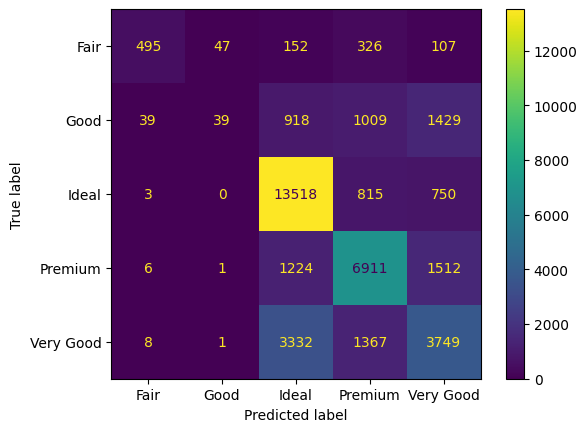

In [34]:
cm_train = confusion_matrix(y_train, y_train_predict, labels=LR_model_ovr.classes_)

ConfusionMatrixDisplay(cm_train, display_labels=LR_model_ovr.classes_).plot();

In [35]:
# On test dataset

print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

        Fair       0.92      0.43      0.58       483
        Good       0.45      0.01      0.02      1472
       Ideal       0.71      0.89      0.79      6465
     Premium       0.65      0.70      0.68      4137
   Very Good       0.49      0.45      0.47      3625

    accuracy                           0.65     16182
   macro avg       0.64      0.50      0.51     16182
weighted avg       0.63      0.65      0.61     16182



In [36]:
accuracy_score(y_test, y_test_predict)

0.6515881844024225

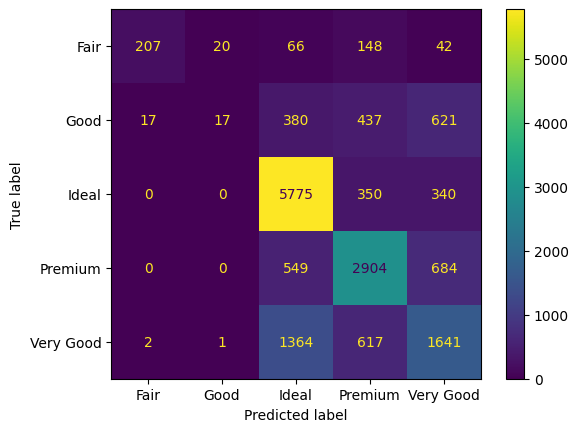

In [37]:
cm_test = confusion_matrix(y_test, y_test_predict, labels=LR_model_ovr.classes_)

ConfusionMatrixDisplay(cm_test, display_labels=LR_model_ovr.classes_).plot();

### Multinomial Logistic Regression

By default the `LogisticRegression` class of sklearn will use `multinomial` method for multi-class classification when `n_classes >= 3`. Learn more about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [38]:
LR_model_multinomial = LogisticRegression(penalty=None, max_iter=1000)

LR_model_multinomial.fit(X_train, y_train)

,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [39]:
# predicting on train and test dataset

y_train_predict = LR_model_multinomial.predict(X_train)
y_test_predict = LR_model_multinomial.predict(X_test)

In [40]:
# On train dataset

print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

        Fair       0.75      0.51      0.61      1127
        Good       0.55      0.12      0.19      3434
       Ideal       0.72      0.85      0.78     15086
     Premium       0.66      0.72      0.69      9654
   Very Good       0.50      0.47      0.48      8457

    accuracy                           0.65     37758
   macro avg       0.64      0.53      0.55     37758
weighted avg       0.64      0.65      0.63     37758



In [41]:
accuracy_score(y_train, y_train_predict)

0.6549605381640977

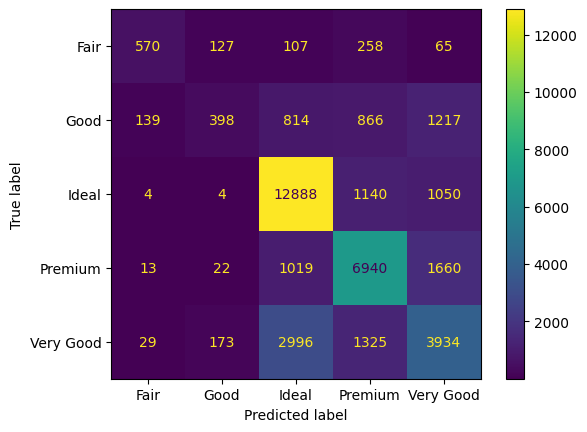

In [43]:
cm_train = confusion_matrix(y_train, y_train_predict, labels=LR_model_ovr.classes_)

ConfusionMatrixDisplay(cm_train, display_labels=LR_model_ovr.classes_).plot();

In [44]:
# On test dataset

print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

        Fair       0.76      0.49      0.59       483
        Good       0.55      0.13      0.22      1472
       Ideal       0.73      0.85      0.78      6465
     Premium       0.65      0.71      0.68      4137
   Very Good       0.49      0.47      0.48      3625

    accuracy                           0.65     16182
   macro avg       0.64      0.53      0.55     16182
weighted avg       0.64      0.65      0.63     16182



In [45]:
accuracy_score(y_test, y_test_predict)

0.6525151402793227

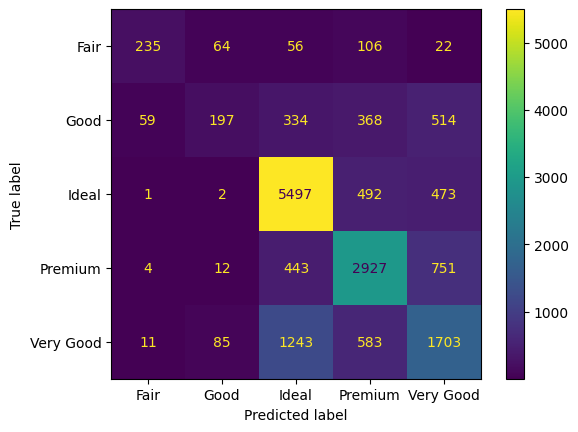

In [46]:
cm_test = confusion_matrix(y_test, y_test_predict, labels=LR_model_ovr.classes_)

ConfusionMatrixDisplay(cm_test, display_labels=LR_model_ovr.classes_).plot();